In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv(r"C:\Users\rashi\OneDrive\Desktop\DL_practicle\housing_data.csv")

C:\Users\rashi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 546.8204 - mae: 21.7821 - val_loss: 485.8279 - val_mae: 20.7165
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 511.5657 - mae: 20.8809 - val_loss: 455.3843 - val_mae: 20.0414
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 445.9041 - mae: 19.6868 - val_loss: 421.7211 - val_mae: 19.2628
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 440.4490 - mae: 19.4004 - val_loss: 382.5885 - val_mae: 18.3102
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 388.8435 - mae: 18.0877 - val_loss: 336.9620 - val_mae: 17.1250
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 348.6674 - mae: 17.0539 - val_loss: 286.1797 - val_mae: 15.6718
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 292.8555 - mae: 15.3304 - val_loss: 231.5287 - val_mae: 13.8912
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 203.9145 - mae: 12.7136 - val_loss: 179.2160 - val_mae: 11.8492
Epoch 9/100
9/9 ━━━━━━━━

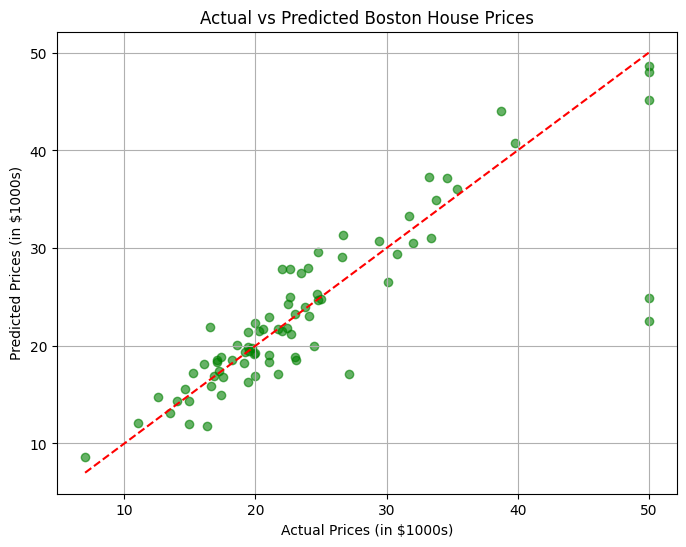

In [3]:
data = data.dropna()

# Split features and target
X = data.drop("MEDV", axis=1)
y = data["MEDV"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the DNN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"\nMean Absolute Error on Test Data: {mae:.2f}")

# Predict house prices
y_pred = model.predict(X_test_scaled).flatten()

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Print actual vs predicted prices (first 10 examples)
print("\nActual vs Predicted House Prices (First 10 rows):")
for actual, predicted in list(zip(y_test, y_pred))[:10]:
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Prices (in $1000s)')
plt.ylabel('Predicted Prices (in $1000s)')
plt.title('Actual vs Predicted Boston House Prices')
plt.grid(True)
plt.show()

